In [1]:
from pathlib import Path

import pandas as pd
from tqdm.auto import tqdm

from utilsPlots import *


In [2]:
datadir = Path('../datadir')

figdir = Path('./figs')
figdir.mkdir(exist_ok=True, parents=True)


In [3]:
df_info = pd.read_csv(datadir / 'participant_info.csv')
df_feat = pd.read_csv(datadir / 'video_features.csv')
df_all = df_info.merge(df_feat, on=['ID', 'day'])


In [4]:
df = df_all.copy()
df = df[df.day.isin([118, 119])]
df = df[df.duplicated(subset=['ID'], keep=False)]
df = df.sort_values('day')
N = df.ID.nunique()
print(f'{N} test-retest participants')


13 test-retest participants


In [5]:
df_feat_key = pd.read_csv(datadir / 'feature_key.csv')
feat_name_map = dict(zip(df_feat_key.feature_code, df_feat_key.name))
feat_act_map = dict(zip(df_feat_key.feature_code, df_feat_key.activity_code))

feat_color_map = {
    'Run': '#117733',
    'Walk': '#44AA99',
    'TUG': '#332288',
    '5xSTS': '#88CCEE',
    'Brooke': '#D0AB41',
    'ArmRoM': '#D0AB41',
    'Curls': '#D0AB41',
    'ToeStand': '#CC6677',
    'Jump': '#882255',
}


In [6]:
# load ICC values from pre-computed file
df_icc = pd.read_csv('icc_results.csv')


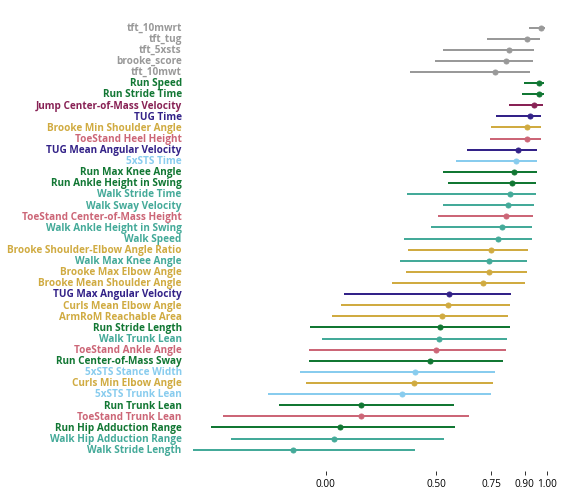

In [7]:
plt.figure(figsize=(8,7))

yticks = []
ytick_labels = []
for i, row in df_icc.iterrows():
    y = -i
    color = feat_color_map.get(feat_act_map.get(row.feat, None), '#999999')
    plt.errorbar(x=row['icc'], y=y,
                 xerr=[[row['icc']-row['lbound']],
                       [row['ubound']-row['icc']]],
                 fmt='o', color=color,
                 ms=5,
                 lw=2, elinewidth=2,
                 solid_capstyle='projecting', capsize=0, capthick=2)

    plt.text(-0.65, y, feat_name_map.get(row.feat, row.feat),
             va='center', ha='right',
             c=color, weight='bold')    

plt.xticks([0, 0.5, 0.75, 0.9, 1])
plt.yticks([], [])
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig(figdir/'fig3_icc_supplement.pdf')
plt.show()
